In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

# 데이터셋 로드
(train_dataset, test_dataset), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True)

# 이미지 전처리 함수 정의
def preprocess_image(image, label):
    image = tf.image.resize(image, (150, 150))  # 이미지 크기는 150x150
    image /= 255.0                              # 0~1 사이의 값으로 scaling
    return image, label

# 데이터셋 전처리 및 배치 설정, 일괄 적용
BATCH_SIZE = 32
train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(BATCH_SIZE)
test_dataset = test_dataset.map(preprocess_image).batch(BATCH_SIZE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incomplete4T3MVP/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import zipfile
import seaborn as sns

from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, Dropout,Flatten, Dense, Input)

In [3]:
type(train_dataset), len(train_dataset), type(test_dataset), len(test_dataset)

# train_dataset의 길이 - 582
# 582 * batch_size(32) = 약 18000개
# test_dataset의 길이 - 146
# 146 * batch_size(32) = 약 5000개

(tensorflow.python.data.ops.batch_op._BatchDataset,
 582,
 tensorflow.python.data.ops.batch_op._BatchDataset,
 146)

In [4]:
for batch_images, batch_labels in train_dataset:
    # Do something with the current batch
    # For example, print the shape of the images and labels in the batch
    print("Batch Images Shape:", batch_images.shape)
    print("Batch Labels Shape:", batch_labels.shape)
    break

Batch Images Shape: (32, 150, 150, 3)
Batch Labels Shape: (32,)


In [5]:
first_batch_images, first_batch_labels = next(iter(train_dataset.take(1)))

In [6]:
first_batch_images[0]

<tf.Tensor: shape=(150, 150, 3), dtype=float32, numpy=
array([[[0.91813725, 0.875     , 0.79656863],
        [0.90931374, 0.8661765 , 0.7877451 ],
        [0.9062091 , 0.86307186, 0.7846405 ],
        ...,
        [0.28333333, 0.22058824, 0.11862745],
        [0.2740196 , 0.2112745 , 0.11127451],
        [0.27140522, 0.20473854, 0.09493462]],

       [[0.8872549 , 0.84411764, 0.7656863 ],
        [0.8730392 , 0.82990193, 0.75147057],
        [0.8720588 , 0.82892156, 0.7504902 ],
        ...,
        [0.2397059 , 0.17254902, 0.07303919],
        [0.22696078, 0.16421568, 0.06617647],
        [0.22500005, 0.15539221, 0.04852947]],

       [[0.8872549 , 0.84411764, 0.7656863 ],
        [0.86764705, 0.8245098 , 0.74607843],
        [0.87026143, 0.8271242 , 0.7486928 ],
        ...,
        [0.23529412, 0.16470589, 0.07156857],
        [0.22598039, 0.15637255, 0.06470589],
        [0.24607843, 0.16764706, 0.06960785]],

       ...,

       [[0.26928103, 0.19477125, 0.13594772],
        [0.22

In [7]:
first_batch_labels[0]

<tf.Tensor: shape=(), dtype=int64, numpy=0>

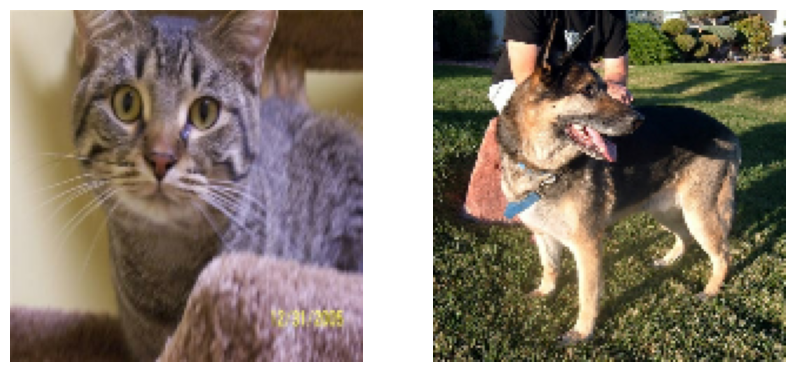

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(first_batch_images[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(first_batch_images[1])
plt.axis('off')

plt.show()

In [20]:
input_layer = Input(shape=(150,150,3))
x = Conv2D(32,(3,3),activation='relu',padding='same')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.3)(x)

x = Conv2D(64,(3,3),activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.3)(x)

x = Conv2D(128,(3,3),activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.3)(x)

x = Flatten()(x)
x = Dense(64,activation='relu')(x)
x = Dense(1,activation='sigmoid')(x)

model = Model(inputs=input_layer,outputs=x)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 batch_normalization_7 (Bat  (None, 150, 150, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 73, 73, 64)        1849

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

history = model.fit(train_dataset, validation_data=test_dataset, epochs=14)

Epoch 1/14
582/582 [==============================] - 49s 78ms/step - loss: 0.7471 - acc: 0.6066 - val_loss: 0.6730 - val_acc: 0.6453
Epoch 2/14
582/582 [==============================] - 41s 68ms/step - loss: 0.5231 - acc: 0.7339 - val_loss: 0.7799 - val_acc: 0.6980
Epoch 3/14
582/582 [==============================] - 41s 68ms/step - loss: 0.4471 - acc: 0.7887 - val_loss: 0.4923 - val_acc: 0.7390
Epoch 4/14
582/582 [==============================] - 40s 68ms/step - loss: 0.3923 - acc: 0.8185 - val_loss: 0.4421 - val_acc: 0.7962
Epoch 5/14
582/582 [==============================] - 42s 71ms/step - loss: 0.3444 - acc: 0.8458 - val_loss: 0.4206 - val_acc: 0.8214
Epoch 6/14
582/582 [==============================] - 40s 67ms/step - loss: 0.3070 - acc: 0.8613 - val_loss: 0.6154 - val_acc: 0.7646
Epoch 7/14
582/582 [==============================] - 40s 67ms/step - loss: 0.2789 - acc: 0.8752 - val_loss: 1.7866 - val_acc: 0.6255
Epoch 8/14
582/582 [==============================] - 41s 68ms

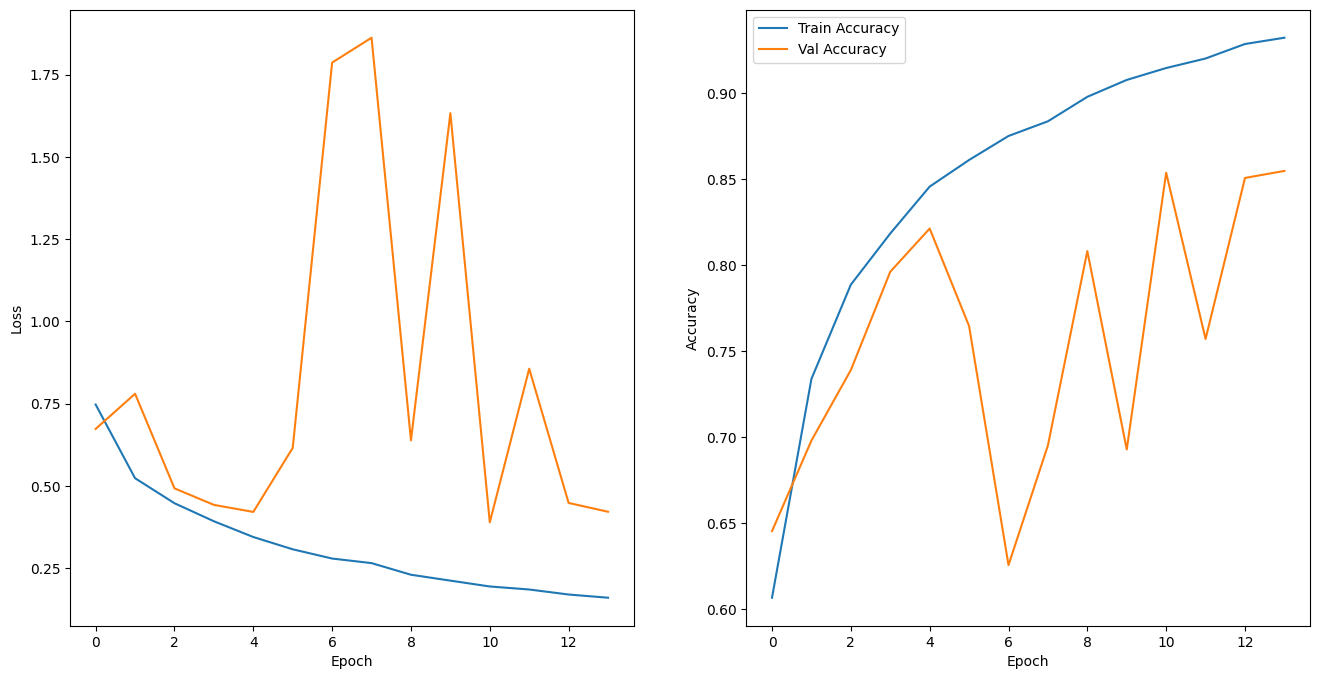

In [24]:
# 학습곡선 그리기
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'],hist['loss'],label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],label='Val Loss')

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'],hist['acc'],label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'],label='Val Accuracy')
  plt.legend()

  plt.show()

plot_history(history)

In [23]:
# 테스트 정확도 평가
test_loss, test_acc = model.evaluate(test_dataset)
print('테스트 정확도:', test_acc)

146/146 [==============================] - 5s 33ms/step - loss: 0.4212 - acc: 0.8549
테스트 정확도: 0.854901134967804
